## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how="left", on=["Mouse ID", "Mouse ID"])
combined_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


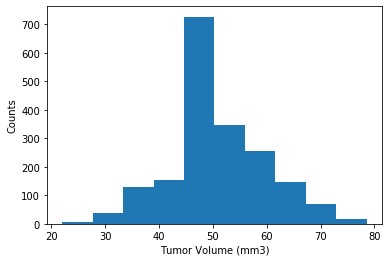

Mean of the study results is: 50.45
Median of the study results is: 48.95
Mode of the study results is: 0    45.0
dtype: float64
NormaltestResult(statistic=3.9075291385961104, pvalue=0.14173947787360316)


In [2]:
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median of the study results is: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode of the study results is: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        TM_Mean=('Tumor Volume (mm3)', np.mean),\
        TM_Median=('Tumor Volume (mm3)', np.median),\
        TM_Var=('Tumor Volume (mm3)', np.var),\
        TM_Stdev=('Tumor Volume (mm3)', np.std),\
        TM_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,TM_Mean,TM_Median,TM_Var,TM_Stdev,TM_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

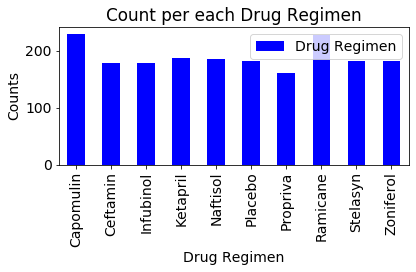

In [29]:
# Create dataframe using the drug regimen column
drug_group = combined_data.groupby('Drug Regimen')
# Using the dataframe, count the number of points for each treatment regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())
# Create a bar chart & label the title
count_chart=drug_group_count.plot(kind='bar', title='Count per each Drug Regimen', color='blue')
# x & y labels
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Counts')
plt.tight_layout()

plt.show()

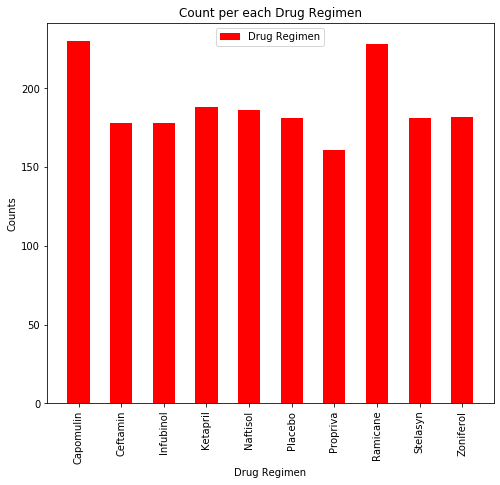

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe above
# Define tick locations and x axis
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

# Form list showing x labels
plt.figure(figsize=(8,7))
plt.bar(x_axis, drug_group_count['Drug Regimen'], color='red', align='center', width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation='vertical')

# Plot title & labels
plt.title('Count per each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts') 

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
         
plt.show()

## Pie plots

In [8]:

# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create dataframe showing the 'sex' column
# Also create dataframe for data points count for each gender

gender_group=combined_data.groupby('Sex')

gender_group_count=pd.DataFrame(gender_group['Sex'].count())

gender_group_count.head()

,Sex
Sex,
Female,935
Male,958


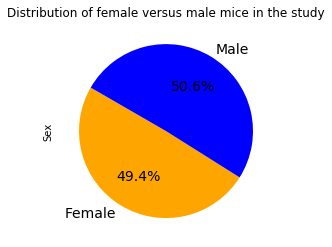

In [9]:
# Generate a pie plot showing the distribution of female versus male mice from the group series done above, using pyplot
#gender_group_count.plot(kind='pie', y='sex', \)
gender_group_count.plot(kind='pie', y='Sex', \
                        title='Distribution of female versus male mice in the study',startangle=150,\
                        autopct='%1.1f%%',shadow=False, fontsize=14, colors =['orange','blue'],legend =False)

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# From the merged dataframe (combined_data), create another dataframe from it with the 4 drugs;  Capomulin, Ramicane, Infubinol, and Ceftamin under the header 'drug regimen' 
# Create a list with the following drugs Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drug_treatment=combined_data[combined_data['Drug Regimen'].isin(drug_list)]
four_drug_treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Using Mouse ID, groupby
Tumor_volume=four_drug_treatment.groupby(['Drug Regimen','Mouse ID']).agg(\
# Using a lambda function                                                               
Final_Tumor_Vol=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)                                                               

Tumor_volume

Final_Tumor_Vol
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

## Line and scatter plots

In [13]:
# Using the unstack method, rearrange dataframe using drug regimen as columns, also move final_tumor_vol to index using stack, and subsequently view the result

Tumor_volume_unstack = Tumor_volume.stack(level=0).unstack(level=0)
Tumor_volume_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Final_Tumor_Vol,NaN,NaN,67.973,NaN
a251,Final_Tumor_Vol,NaN,NaN,65.526,NaN
a275,Final_Tumor_Vol,NaN,62.999,NaN,NaN
a411,Final_Tumor_Vol,NaN,NaN,NaN,38.408
a444,Final_Tumor_Vol,NaN,NaN,NaN,43.048


In [14]:
# Quartile calculations for the four drugs
counter = 0

for drug in drug_list:
    quartiles = Tumor_volume_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

if counter == 0:
    print(f"--------------------------------------------------------")
print(f"{drug} IQR data is:")
print(f"The lower quartile of {drug} is: {lowerq}")
print(f"The upper quartile of {drug} is: {upperq}")
print(f"The interquartile range of {drug} is: {iqr}")
print(f"The the median of {drug} is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} for {drug} could be outliers.")
print(f"Values above {upper_bound} for {drug} could be outliers.")
print(f"--------------------------------------------------------")
counter += 1

--------------------------------------------------------
Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.35 for Ceftamin could be outliers.
Values above 87.67 for Ceftamin could be outliers.
--------------------------------------------------------


In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Make an empty box plot list
boxplot_list = []
for drug in drug_list:
    boxplot_list.append (list(Tumor_volume_unstack[drug].dropna()))

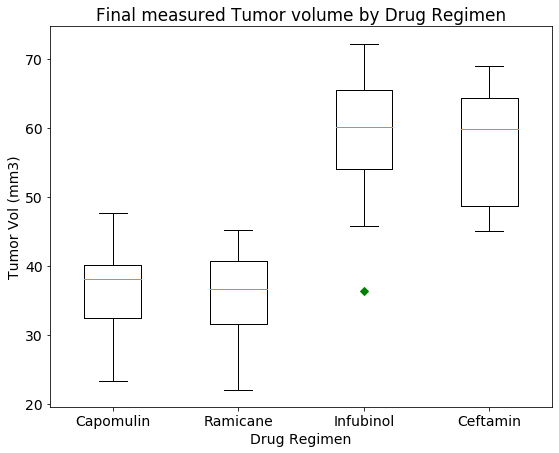

In [17]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


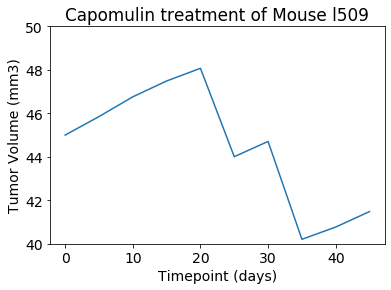

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_analysis = combined_data.groupby(["Drug Regimen"])

# combined_data.head()
capomulin_df = combined_data.loc[ (combined_data["Drug Regimen"] == "Capomulin") ,:]
capomulin_df.head()

capomulin_my_mouse_df = capomulin_df.loc[ (capomulin_df["Mouse ID"] == "l509") ,:]
capomulin_my_mouse_df.head()


x_axis = capomulin_my_mouse_df['Timepoint']
y_axis = capomulin_my_mouse_df['Tumor Volume (mm3)']
plt.ylim(40, 50)
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis)

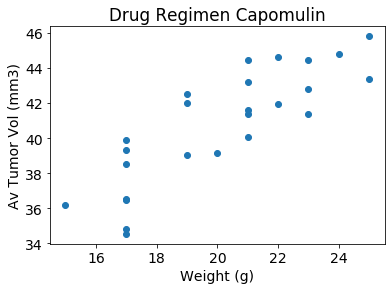

In [22]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#mouse_weight = combined_data.groupby(["Drug Regimen"])

combined_data.head()

capomulin_df = combined_data.loc[ (combined_data['Drug Regimen']== 'Capomulin') , :]
capomulin_df.head()

x_axis = capomulin_df.groupby('Mouse ID').mean()['Weight (g)']
y_axis = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

x = x_axis
y = y_axis
plt.title('Drug Regimen Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
plt.scatter(x, y)

The correlation factor is 0.84
y = 0.95x + 21.55


NameError: name 'x_values' is not defined

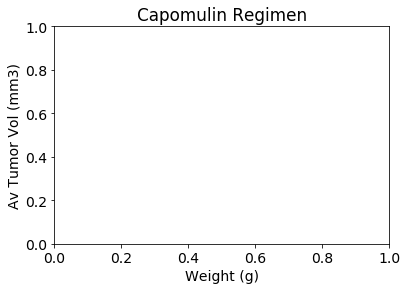

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#calculating the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
print(f"The correlation factor is {round(rvalue, 2)}")

# formating the chart
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Av Tumor Vol (mm3)')
regress = x * slope + intercept
line_eq = print(f"y = {round(slope, 2)}x + {round(intercept, 2)}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 30), fontsize=15, color='red')

plt.show()

In [ ]:
1. From the analysis above, Capomulin appeared to have the best results of the research. Also observed the average weight of the mice treated with this drug was the lowest comparatively.
2. Capomulin also appears to have a good effect or impact on the treatment of tumors, from the (Capomulin treatment of mouse I509) plot above illustrates this. Ramicane also appeared equally effective.
3. Looking at the distribution between the male & female mice on the pie plot looks identical, will be interesting to know if the sex had any relationship with the potency of the drugs in this experiment.